## Convolutional Neural Network  Tutorial
- Download dataset from Keras
-  Visualize data (Image/Pixels)
- Reshape the data
- Normalize the data
- Visualize the data(pixels) after normalizing
- One hot encoding the labels
- Mounting in colab and displying Image
- Build the LeNet Model
- Calculating Number of parameters
- Keras Callbacks
- Compile the model
- validation split(sklearn)
- Fit the model
- Tensorboard Visualization
- Plot the graphs
- Evaluate on test data
- Testing on individual images on test data
- Plot the confusion Matrix
- Visualizing Learned Filters


### Datasets and Pre Processing

In [0]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


### Visualizing the dataset

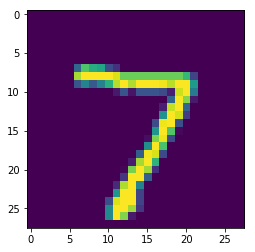

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='viridis')

In [0]:
print(xtest[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest = xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

In [0]:
#print(xtest[0])

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [0]:
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
import keras
from keras import models
from keras import layers

### Mounting In Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
print(os.getcwd())

/content


In [0]:
import os
os.chdir('/content/My Drive/CNN_Updated_Tutorial/CNN_Tutorial/Models and CSV')
print(os.getcwd())

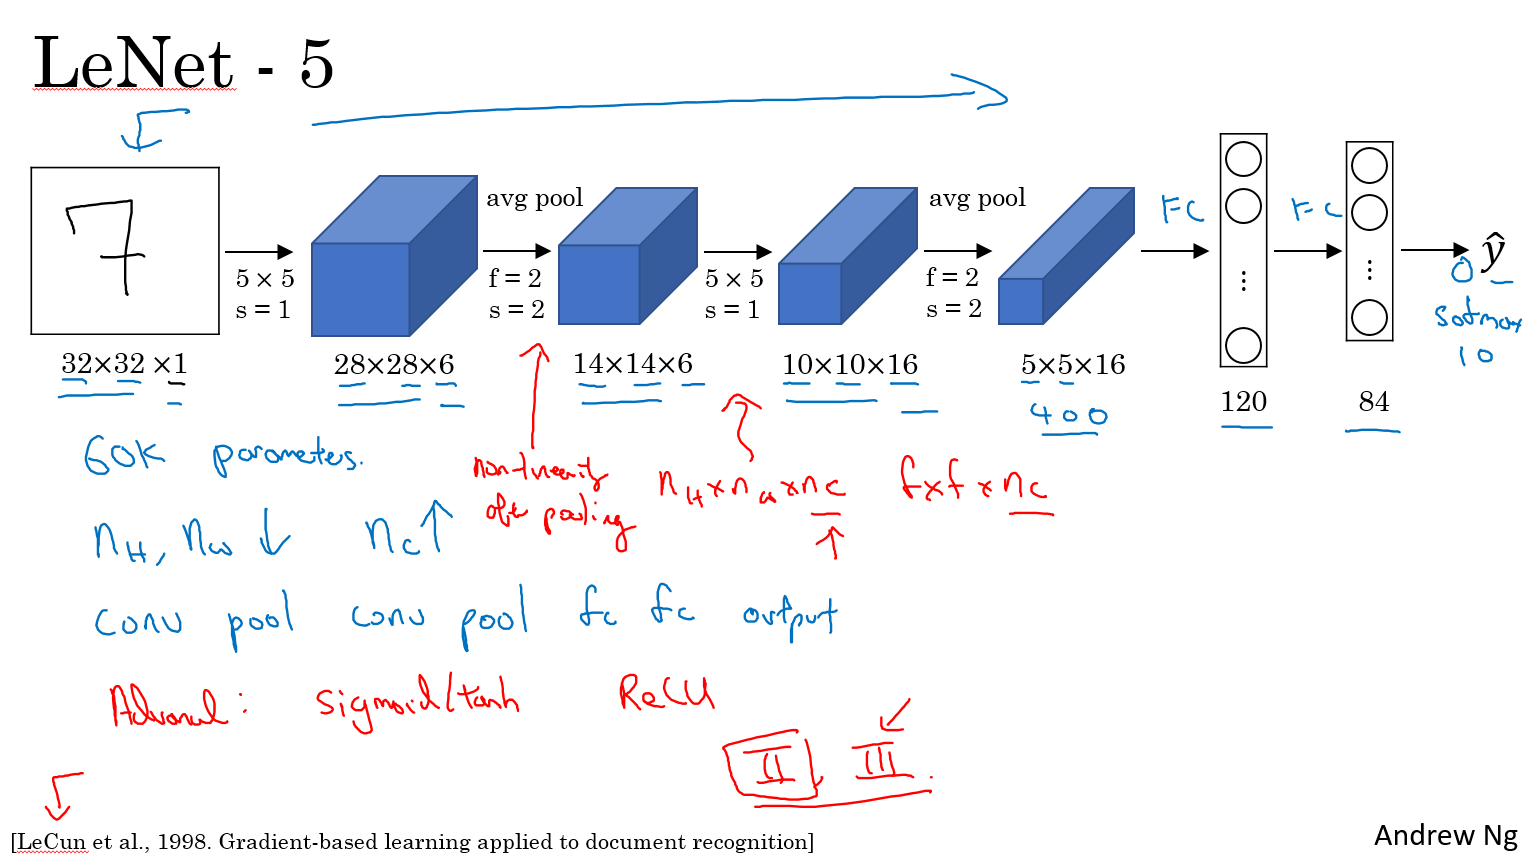

In [0]:
from IPython.display import Image, display
display(Image(filename="/content/cnn/My Drive/CNN_Tutorial/Test_Images/a.png"))

### LeNet Model

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dens

### Saving Model as Image

In [0]:
#from keras.utils import plot_model
#plot_model(model, to_file="a.png")

**Visualization of randomly initialized filters**


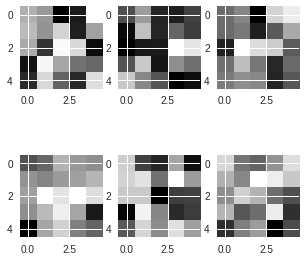

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

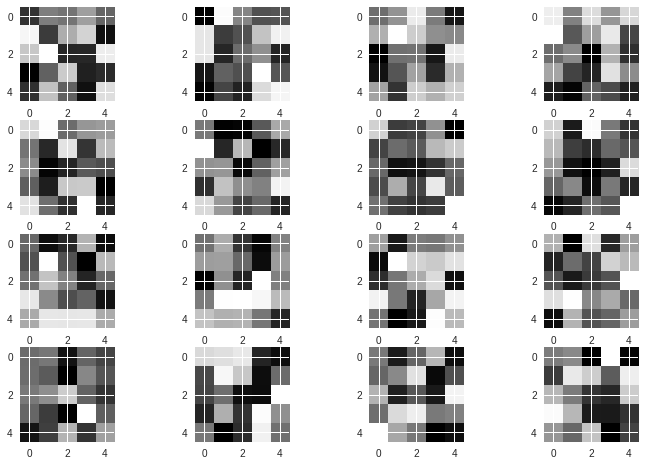

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

**Compile the model**

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

**Keras Callbacks**
* ModelCheckPoint
* TensorBoard
* CSVLogger
* ReduceOnPlateu

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

**Fit the model**

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=25, verbose=2,callbacks=[cv,mc,tb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 2s - loss: 0.5296 - acc: 0.8530 - val_loss: 0.1981 - val_acc: 0.9393
Epoch 2/25
 - 2s - loss: 0.1584 - acc: 0.9529 - val_loss: 0.1171 - val_acc: 0.9652
Epoch 3/25
 - 2s - loss: 0.1090 - acc: 0.9668 - val_loss: 0.0950 - val_acc: 0.9721
Epoch 4/25
 - 2s - loss: 0.0866 - acc: 0.9732 - val_loss: 0.0810 - val_acc: 0.9765
Epoch 5/25
 - 2s - loss: 0.0716 - acc: 0.9782 - val_loss: 0.0833 - val_acc: 0.9756
Epoch 6/25
 - 2s - loss: 0.0651 - acc: 0.9795 - val_loss: 0.0634 - val_acc: 0.9813
Epoch 7/25
 - 2s - loss: 0.0582 - acc: 0.9824 - val_loss: 0.0618 - val_acc: 0.9813
Epoch 8/25
 - 2s - loss: 0.0513 - acc: 0.9839 - val_loss: 0.0592 - val_acc: 0.9818
Epoch 9/25
 - 2s - loss: 0.0439 - acc: 0.9861 - val_loss: 0.0630 - val_acc: 0.9824
Epoch 10/25
 - 2s - loss: 0.0414 - acc: 0.9861 - val_loss: 0.0569 - val_acc: 0.9834
Epoch 11/25
 - 2s - loss: 0.0382 - acc: 0.9877 - val_loss: 0.0489 - val_acc: 0.9858
Epoch 12/25
 - 2s - loss: 0.0337 - 

**Evaluate**

In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 1s 67us/step
0.042079305569519054
0.9889


**Loss and Acc Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(25)

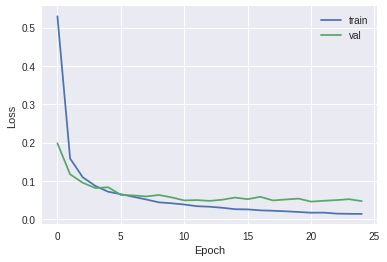

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

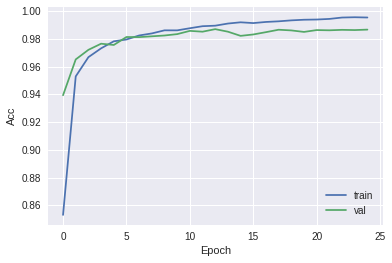

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Prediction**

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[6.24e-11 7.00e-10 4.30e-08 1.37e-06 3.95e-16 3.27e-12 1.80e-19 1.00e+00
  5.26e-09 4.16e-08]]
7


1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
12 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
13 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
14 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
15 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
16 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
17 Actual is  [0. 0. 0. 0. 0. 0. 

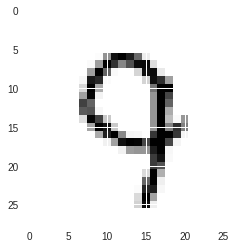

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    plt.imshow(xtest[i].reshape(28, 28),cmap='Greys')
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

**Confusion Matrix**

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       980
     class 1       0.99      1.00      0.99      1135
     class 2       0.99      0.99      0.99      1032
     class 3       0.98      0.99      0.99      1010
     class 4       0.99      0.98      0.99       982
     class 5       0.99      0.98      0.99       892
     class 6       1.00      0.98      0.99       958
     class 7       0.98      0.99      0.99      1028
     class 8       0.99      0.99      0.99       974
     class 9       0.98      0.99      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 975    1    0    0    0    0    0    1    2    1]
 [   0 1130    0    2    0    0    0    2    1    0]
 [   2    0 1024    1    0    0    0    4    1    0]
 [   0    0    1 1003    0    1    0    1    1    3]
 [   0    1    2    0  963    0    2    4    0   10]
 [   2    0    0   10    0  876    1    1    2    0]
 [   4    3    1    1    2    2  943    0    2    0]
 [   0    2    5    0    0    0    0 1016    0    5]
 [   1    0    4    3    0    2    0    1  961    2]
 [   0    1    0    1    3    2    0    3    1  998]]


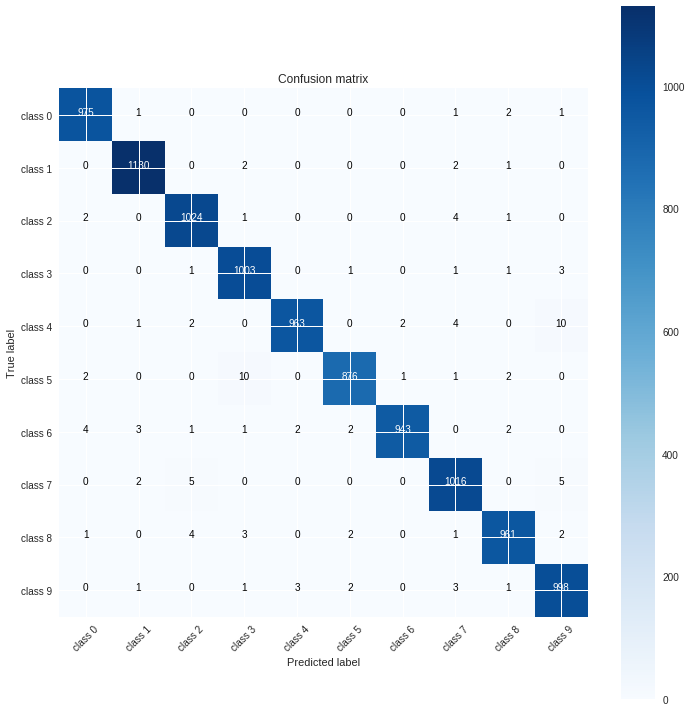

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

**Layers of Model**

In [0]:
for layer in model.layers:
  print(layer)

**Visualizing The Activations**

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))


In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 84)
(1, 10)


**Ist Activation (Convolution_1)**

(1, 24, 24, 6)


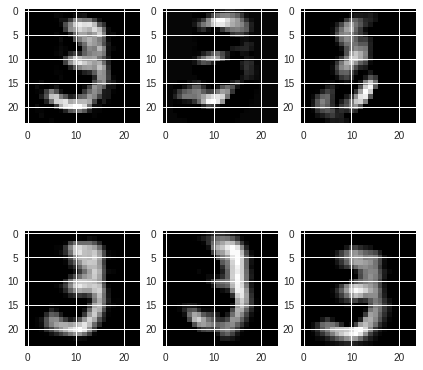

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

**2nd Activation (MaxPooling_1)**

(1, 12, 12, 6)


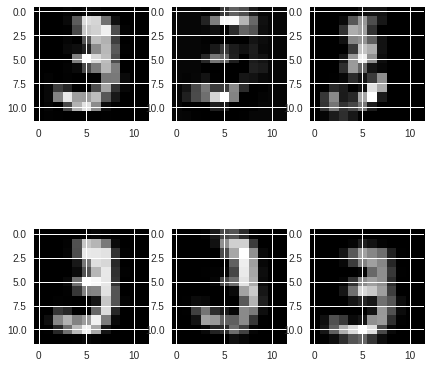

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

**3rd Activation (Convolution_2)**

(1, 8, 8, 16)


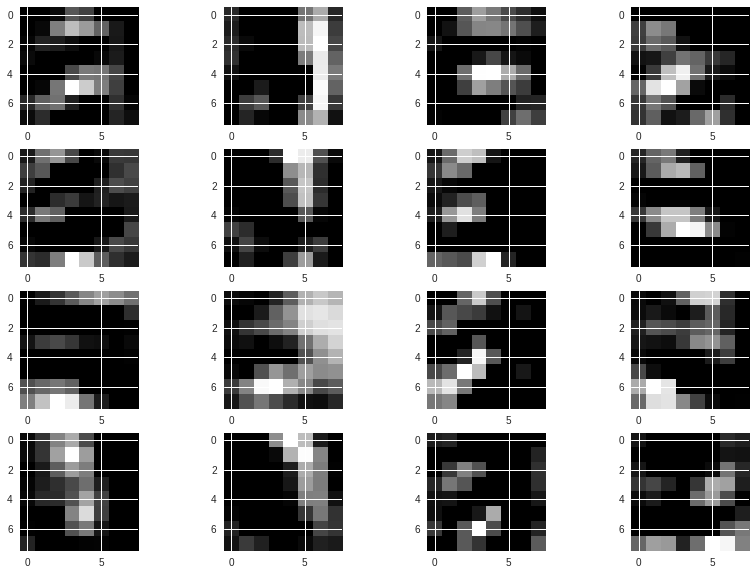

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

**4th Activation (MaxPooling_2)**

(1, 4, 4, 16)


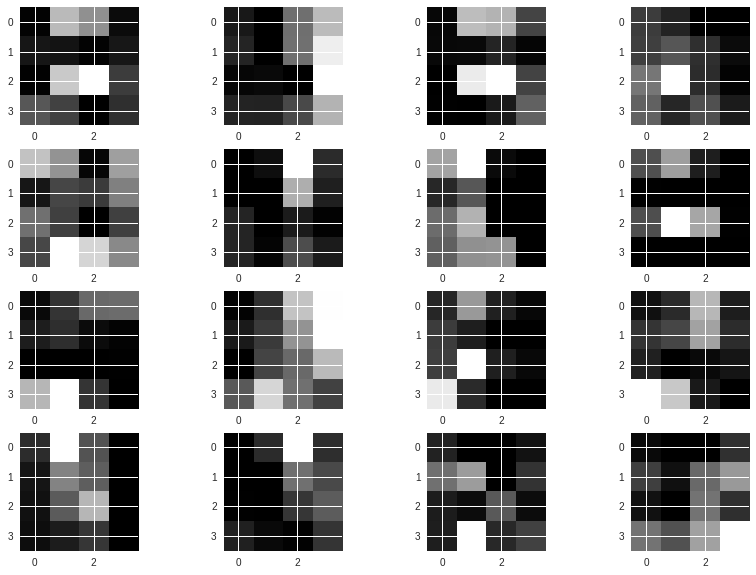

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

**Classification in final layer**

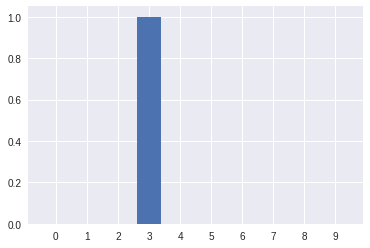

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

**Visualization of filters**

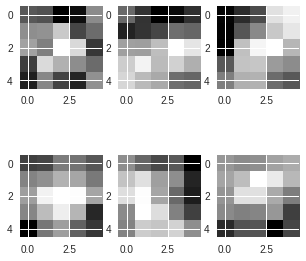

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.04 -0.05 -0.25 -0.22  0.09]
 [ 0.1   0.1   0.24 -0.08  0.01]
 [ 0.14  0.06  0.37  0.28 -0.12]
 [-0.1   0.28  0.18  0.09  0.01]
 [-0.18  0.08 -0.09 -0.16  0.1 ]]

[[-0.12 -0.31 -0.5  -0.46 -0.32]
 [-0.37 -0.31 -0.24 -0.1  -0.13]
 [ 0.09  0.08  0.19  0.44  0.34]
 [ 0.25  0.39  0.18  0.27  0.14]
 [ 0.28  0.18  0.12 -0.1  -0.13]]

[[-0.4  -0.28 -0.18  0.28  0.33]
 [-0.41 -0.15  0.01  0.2   0.3 ]
 [-0.42  0.18  0.34  0.37  0.15]
 [-0.14  0.19  0.2   0.06  0.02]
 [-0.02  0.13  0.13 -0.08 -0.15]]

[[-0.13 -0.11  0.02  0.   -0.07]
 [ 0.04  0.07  0.16  0.13  0.02]
 [ 0.11  0.32  0.35  0.35  0.13]
 [ 0.05  0.18  0.31  0.17 -0.19]
 [-0.29  0.01  0.11 -0.04 -0.15]]

[[ 0.05 -0.09 -0.18 -0.13 -0.43]
 [ 0.22  0.32  0.1   0.05 -0.3 ]
 [ 0.31  0.42  0.12 -0.08 -0.33]
 [ 0.03  0.43  0.31  0.   -0.21]
 [ 0.01  0.25  0.23  0.27  0.05]]

[[ 0.09  0.04  0.06  0.12  0.16]
 [ 0.13  0.21  0.44  0.37  0.2 ]
 [ 0.08  0.33  0.33  0.15 -0.  ]
 [ 0.04  0.01  0.02  0.08 -0.22]
 [-0.29 -0.15 -0.14 -0.43 -0.2 ]]

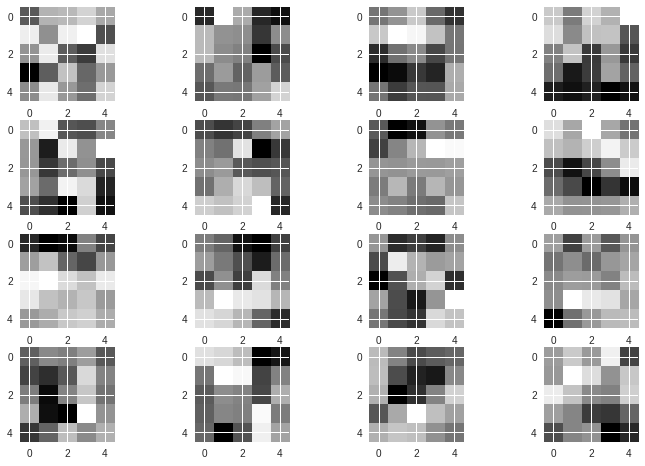

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-0.09  0.01  0.02  0.05  0.  ]
 [ 0.08 -0.03  0.08  0.1  -0.1 ]
 [-0.02  0.07 -0.08 -0.12  0.06]
 [-0.18 -0.08  0.03 -0.07 -0.02]
 [-0.03  0.07 -0.02 -0.06  0.05]]

[[-0.1   0.16  0.06 -0.11 -0.13]
 [ 0.07  0.03  0.02 -0.09  0.02]
 [ 0.07  0.02  0.   -0.15 -0.06]
 [-0.02  0.04 -0.03  0.04 -0.04]
 [-0.05 -0.   -0.01  0.04  0.11]]

[[ 0.02  0.06  0.13  0.   -0.07]
 [ 0.13  0.2   0.19  0.12  0.02]
 [-0.08  0.02  0.05 -0.04  0.02]
 [-0.14 -0.12 -0.06 -0.09  0.09]
 [ 0.02 -0.06 -0.02 -0.02  0.09]]

[[ 0.09  0.01  0.1   0.07  0.15]
 [ 0.11  0.02  0.08  0.09 -0.03]
 [ 0.01  0.09 -0.06  0.04 -0.06]
 [-0.01 -0.1  -0.06  0.05 -0.02]
 [-0.09 -0.11 -0.09 -0.12 -0.1 ]]

[[ 0.05  0.09 -0.04 -0.04  0.  ]
 [ 0.02 -0.08  0.08  0.01  0.1 ]
 [ 0.02 -0.06 -0.02  0.01 -0.05]
 [ 0.02 -0.02  0.09  0.07 -0.08]
 [-0.04 -0.07 -0.11  0.06 -0.09]]

[[-0.07 -0.1  -0.08 -0.01  0.03]
 [-0.01 -0.03  0.1  -0.16 -0.09]
 [ 0.    0.02 -0.05 -0.07 -0.06]
 [-0.03  0.04  0.09  0.06 -0.04]
 [ 0.08  0.06  0.08  0.13 -0.11]]

In [0]:
'''def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x, 0, 1)

  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x'''

"def deprocess_image(x):\n  x -= x.mean()\n  x /= (x.std() + 1e-5)\n  x *= 0.1\n\n  x += 0.5\n  x = np.clip(x, 0, 1)\n\n  x *= 255\n  x = np.clip(x, 0, 255).astype('uint8')\n  return x"

In [0]:
'''def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)'''

'def generate_pattern(layer_name, filter_index, size=150):\n  layer_output = model.get_layer(layer_name).output\n  loss = K.mean(layer_output[:, :, :, filter_index])\n  grads = K.gradients(loss, model.input)[0]\n  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)\n  iterate = K.function([model.input], [loss, grads])\n  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.\n  step = 1.\n  for i in range(40):\n    loss_value, grads_value = iterate([input_img_data])\n    input_img_data += grads_value * step\n    img = input_img_data[0]\n    return deprocess_image(img)'

In [0]:
'''plt.imshow(generate_pattern('conv2d_4', 0))'''

"plt.imshow(generate_pattern('conv2d_4', 0))"

In [0]:
'''layer_name = 'conv2d_3'
size = 6
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8): 
  for j in range(8): 
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)'''

"layer_name = 'conv2d_3'\nsize = 6\nmargin = 5\n\nresults = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))\nfor i in range(8): \n  for j in range(8): \n    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)\n    horizontal_start = i * size + i * margin\n    horizontal_end = horizontal_start + size\n    vertical_start = j * size + j * margin\n    vertical_end = vertical_start + size\n    results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img\nplt.figure(figsize=(20, 20))\nplt.imshow(results)"